In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

sns.set_theme()
warnings.filterwarnings('ignore')

In [2]:
problems = ["breast_cancer", "glass", "diabetes_classification"]

In [3]:
dfs = []
for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
    for problem in problems:
        for seed in range(5):
            for opt in ["adam", "gaussian", "cmaes"]:
                w_text = f"{w}_" if len(w) > 0 else ""
                if os.path.exists(f"../results/ga_{problem}_{opt}_{w_text}{seed}.pickle"):
                    tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w_text}{seed}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["w"] = w if len(w) > 0 else "no w"
                    tmp_df["opt"] = opt
                    tmp_df["problem"] = problem
                    tmp_df["total_time"] = tmp_df["time"].cumsum().astype(int)
                    tmp_df["data_points"] = tmp_df["iteration"] * (
                        1000 if opt == "gaussian" else 4200 if opt == "adam" else 7400)
                    dfs.append(tmp_df)
                else:
                    continue
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,time,test_accuracy,seed,w,opt,problem,total_time,data_points
0,0,0.868545,0.000000,0.860140,0,win,adam,breast_cancer,0,0
1,1,0.915493,7.693082,0.923077,0,win,adam,breast_cancer,7,4200
2,2,0.915493,7.430328,0.923077,0,win,adam,breast_cancer,15,8400
3,3,0.915493,7.534494,0.923077,0,win,adam,breast_cancer,22,12600
4,4,0.915493,7.498733,0.923077,0,win,adam,breast_cancer,30,16800


In [4]:
max_iter = df.groupby(["w", "opt", "seed"])["iteration"].transform("max")
final_df = df[df["iteration"] == max_iter]
final_df

,iteration,max_fitness,time,test_accuracy,seed,w,opt,problem,total_time,data_points
356,356,0.922535,7.608135,0.888112,0,win,adam,breast_cancer,2754,1495200
1856,1499,0.985915,1.186118,0.944056,0,win,gaussian,breast_cancer,1832,1499000
2213,356,0.927230,7.529277,0.909091,1,win,adam,breast_cancer,2742,1495200
3713,1499,0.981221,1.205982,0.958042,1,win,gaussian,breast_cancer,1832,1499000
4070,356,0.924883,7.875209,0.895105,2,win,adam,breast_cancer,2753,1495200
...,...,...,...,...,...,...,...,...,...,...
100064,1499,0.805556,1.144577,0.765625,0,no w,gaussian,diabetes_classification,1736,1499000
101564,1499,0.782986,1.082604,0.781250,1,no w,gaussian,diabetes_classification,1728,1499000
103064,1499,0.781250,1.149682,0.744792,2,no w,gaussian,diabetes_classification,1725,1499000
104564,1499,0.798611,1.108658,0.687500,3,no w,gaussian,diabetes_classification,1723,1499000


In [5]:
# reopt_dfs = []
# for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
#     for problem in problems:
#         for seed in range(3):
#             for reopt in ["adam", "cmaes"]:
#                 for opt in ["adam", "gaussian", "cmaes", "none"]:
#                     try:
#                         tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w}_reopt-{reopt}_{seed}.csv")
#                         tmp_df["seed"] = seed
#                         tmp_df["w"] = w if len(w) > 0 else "no w"
#                         tmp_df["opt"] = opt
#                         tmp_df["reopt"] = reopt
#                         tmp_df["problem"] = problem
#                         reopt_dfs.append(tmp_df)
#                     except FileNotFoundError:
#                         pass
# reopt_df = pd.concat(reopt_dfs, ignore_index=True)
# reopt_df["test_increase"] = reopt_df["test_accuracy"] - reopt_df["previous_test_accuracy"]
# reopt_df["train_increase"] = reopt_df["max_fitness"] - reopt_df["previous_max_fitness"]
# reopt_df["equation"] = reopt_df["equation"].str.replace("<lambda>", "", regex=False)
# reopt_df.head()

In [6]:
# reopt_df.drop(columns=['iteration']).to_csv("equations.csv")

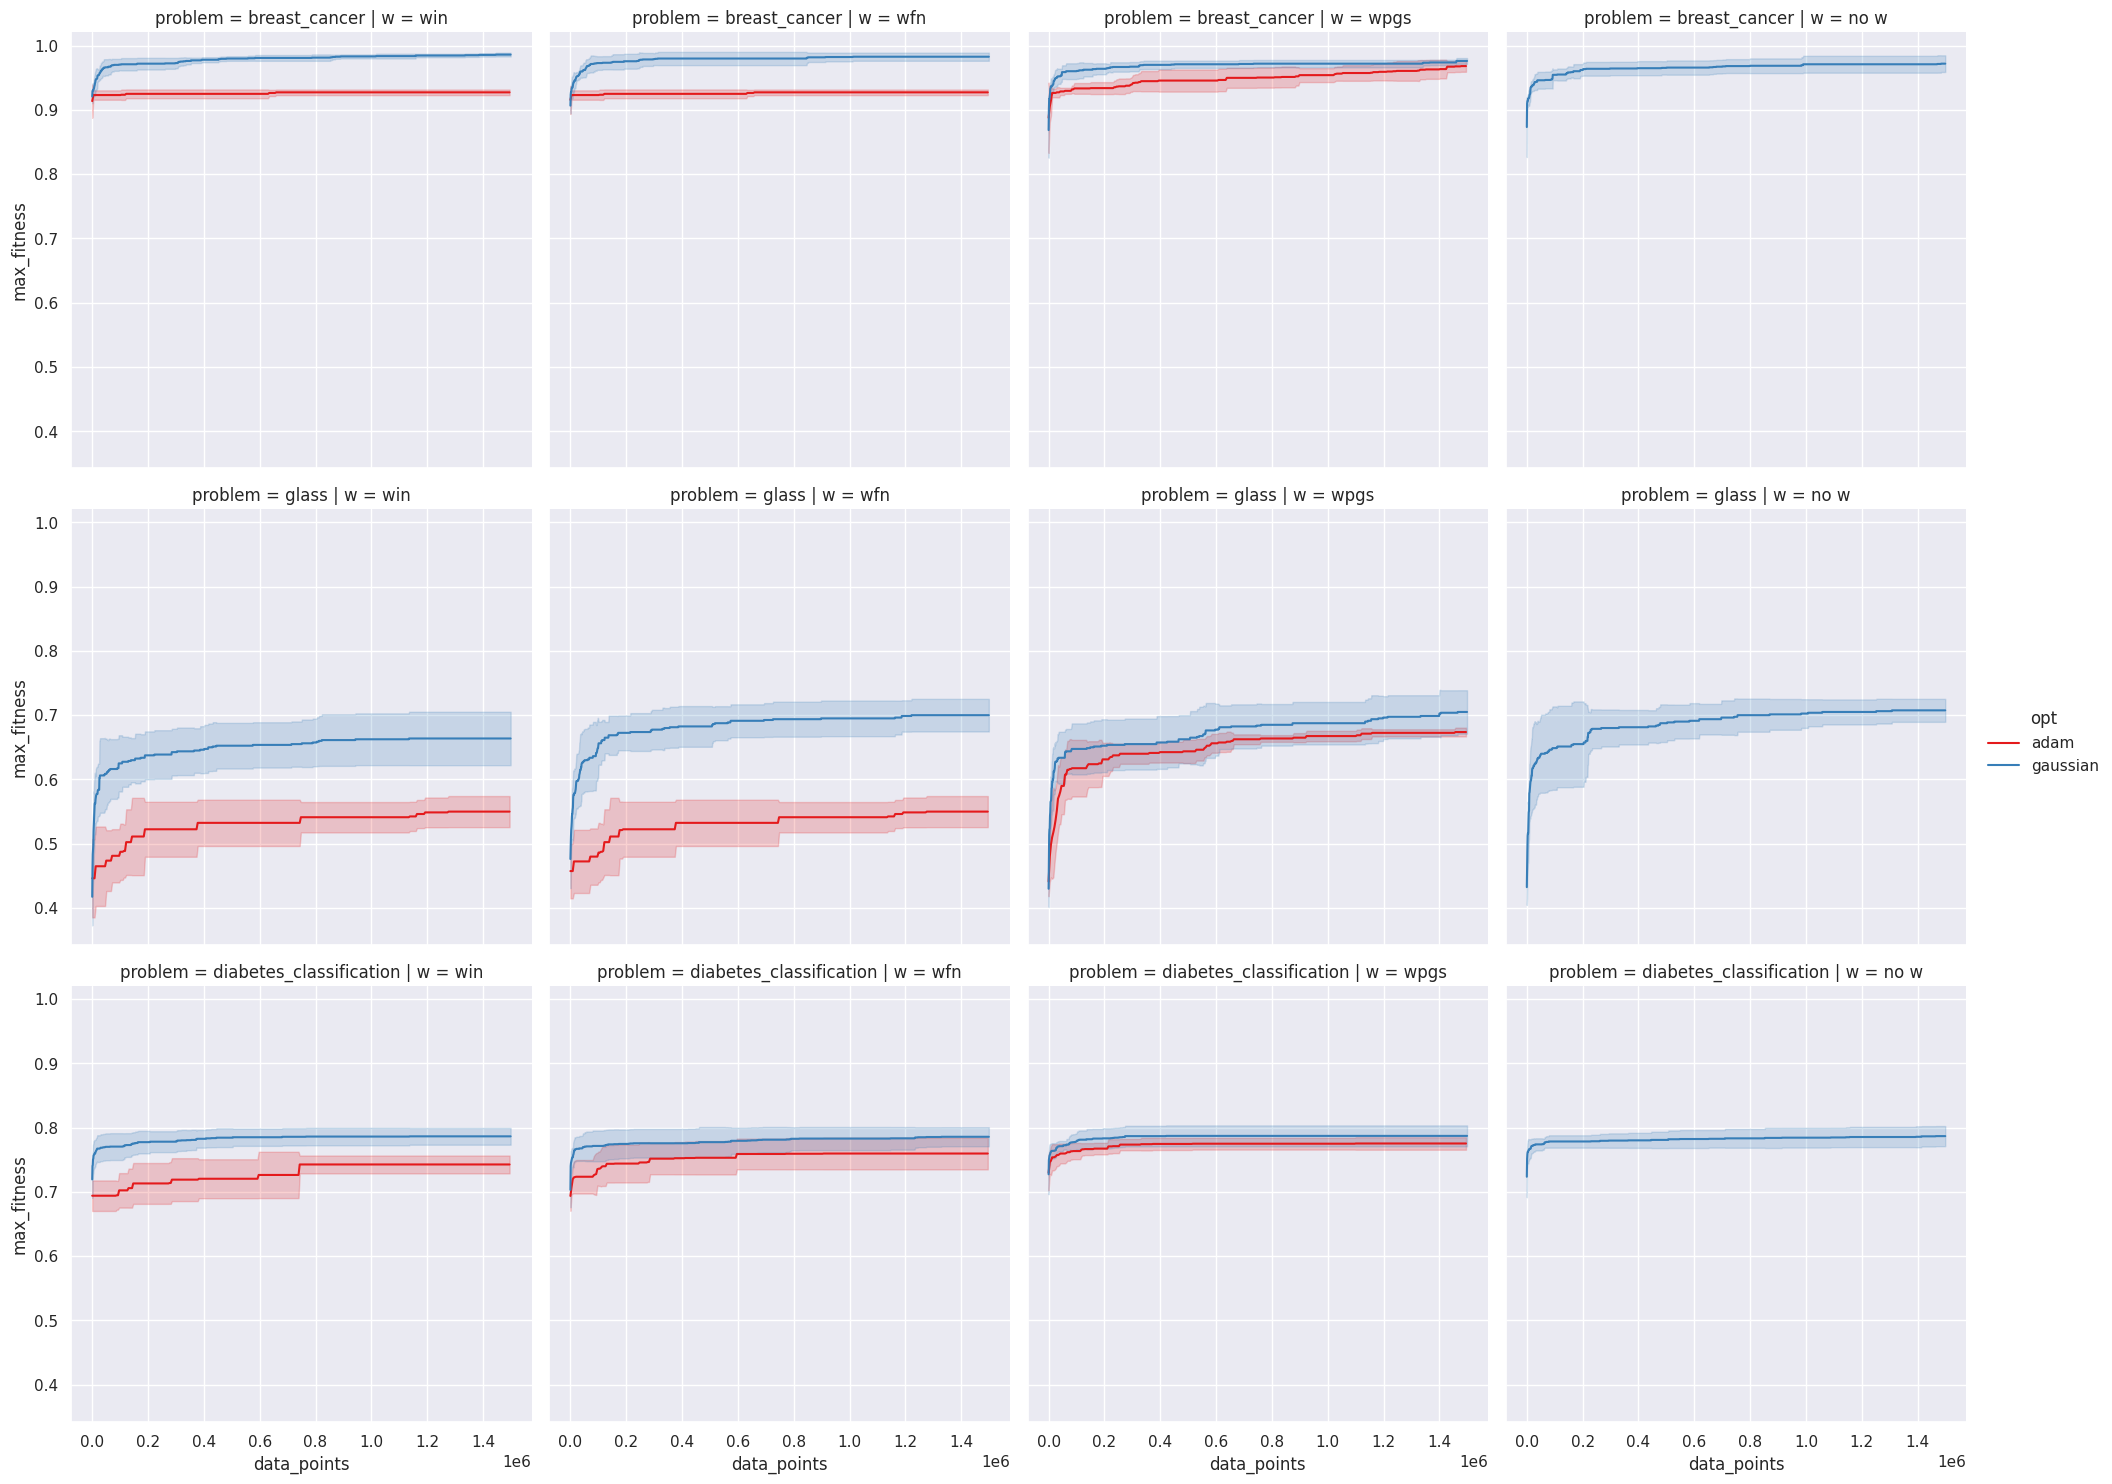

In [7]:
sns.relplot(data=df, x="data_points", y="max_fitness", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
plt.show()

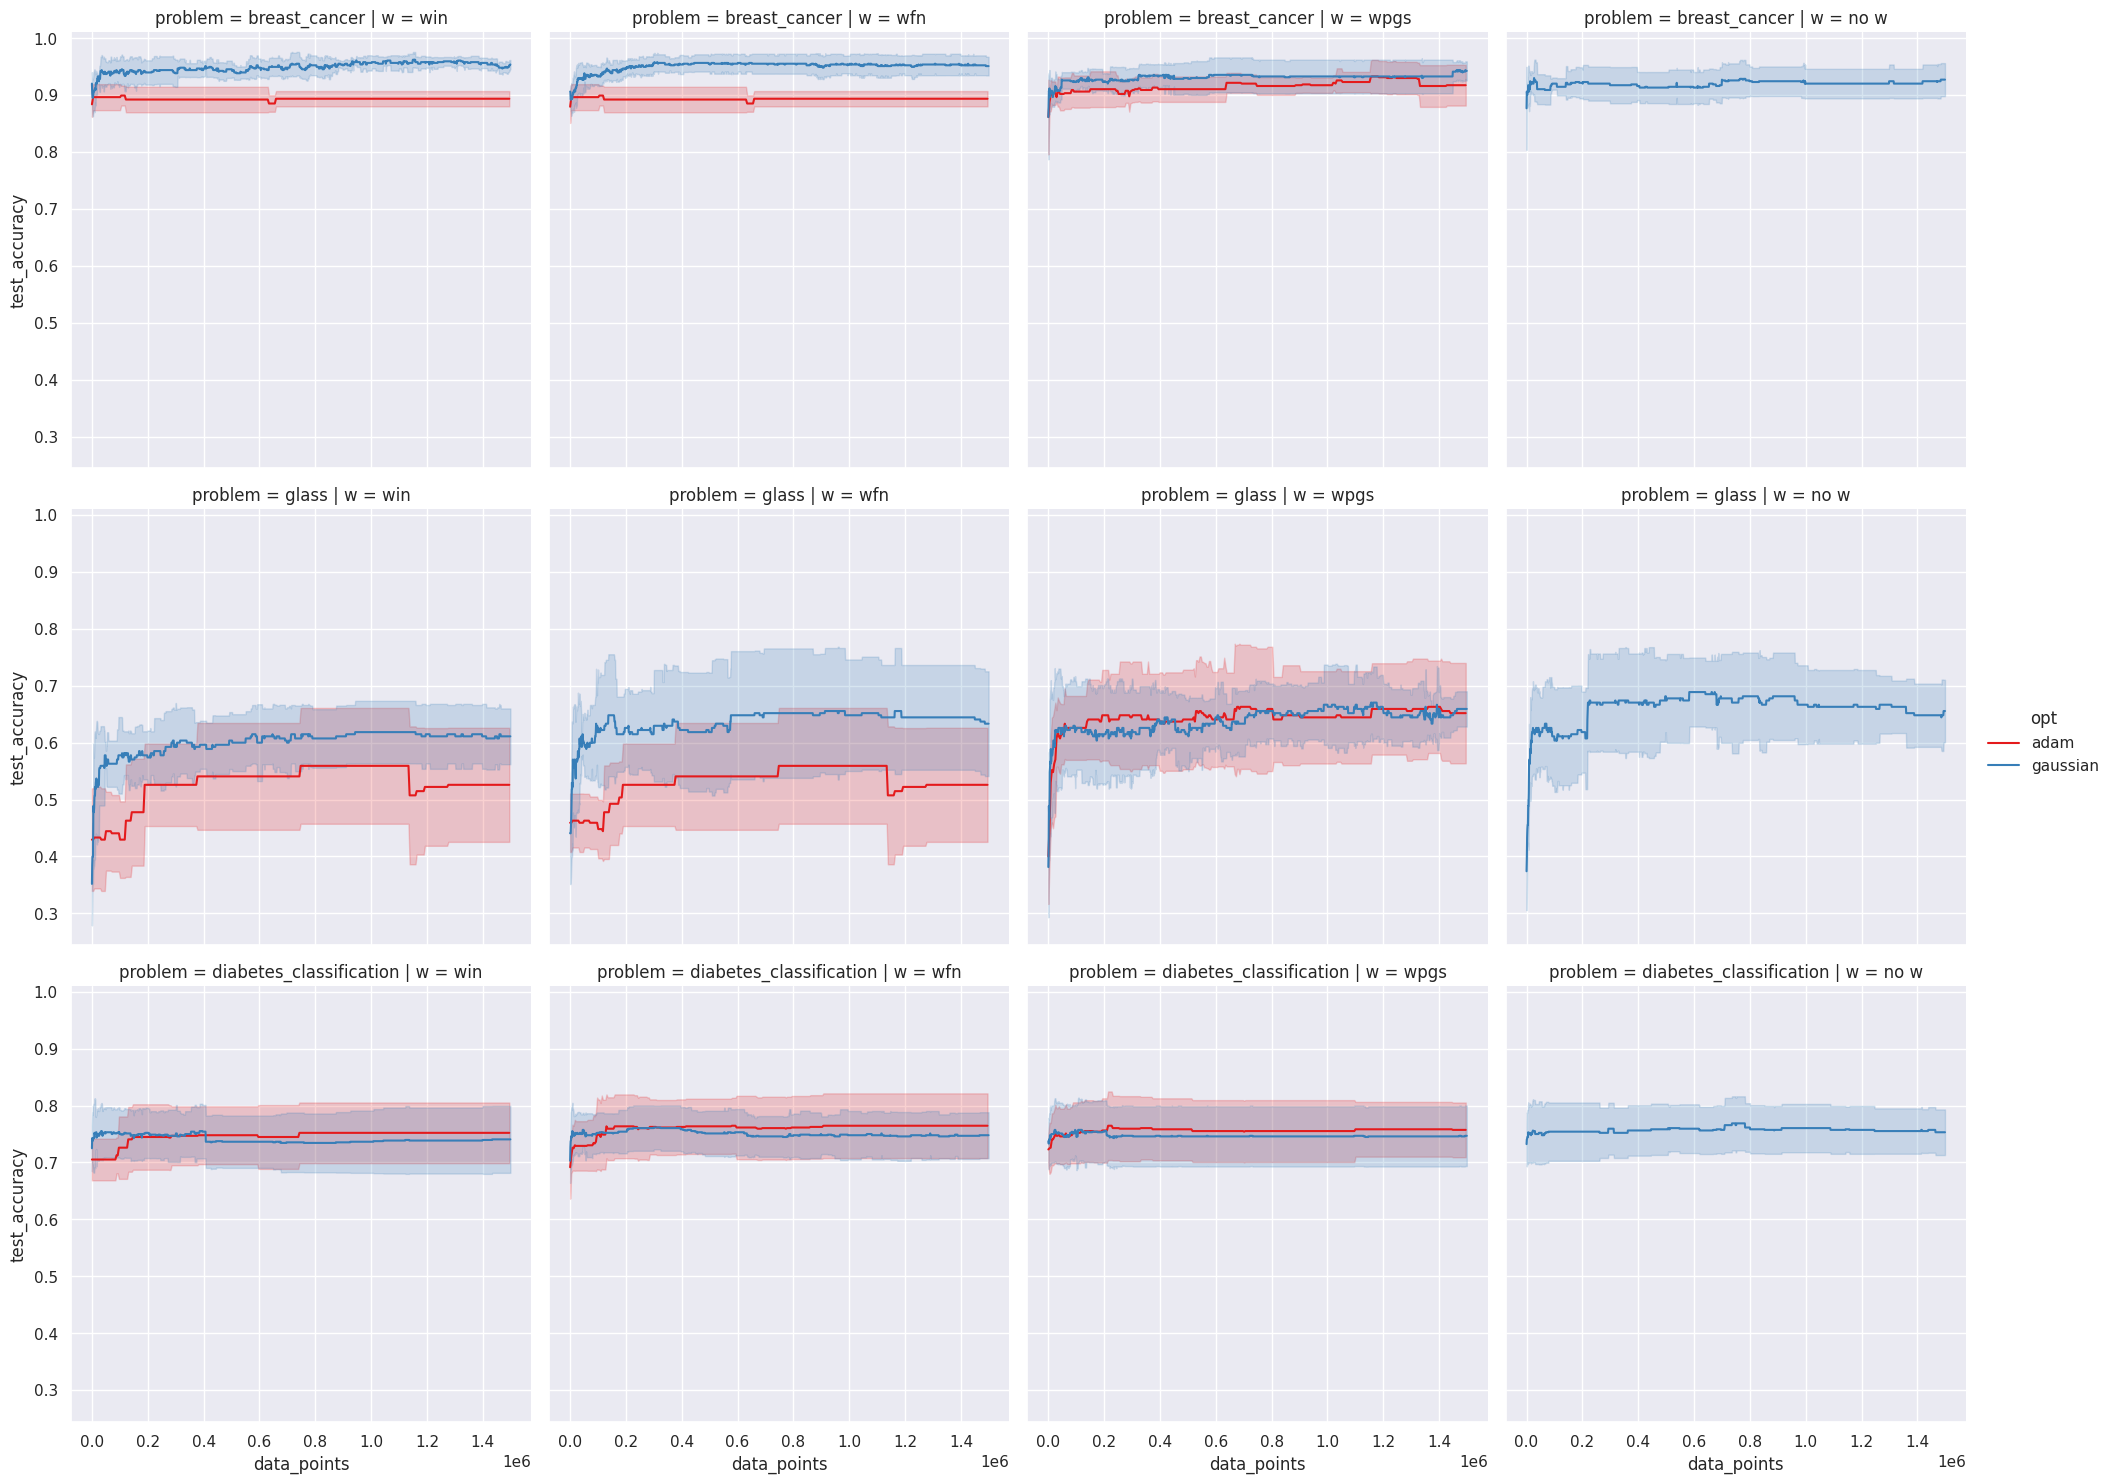

In [8]:
sns.relplot(data=df, x="data_points", y="test_accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
# plt.ylim(-.1, 1.1)
plt.show()

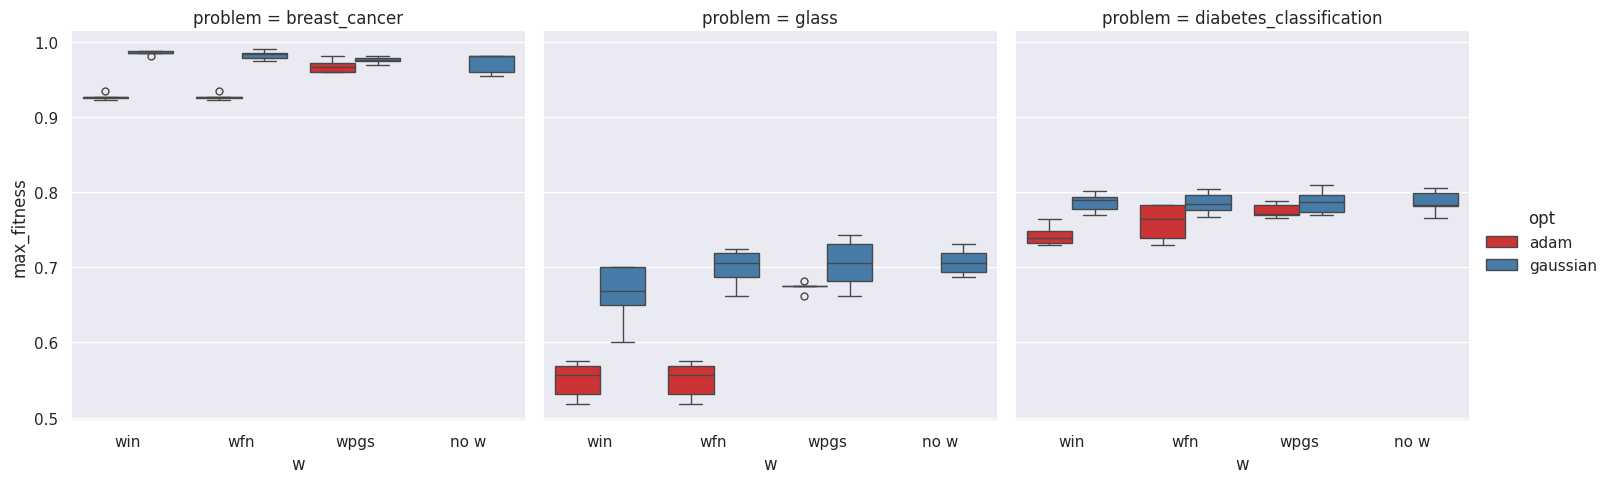

In [9]:
sns.catplot(x="w", y="max_fitness", hue="opt", data=final_df, col="problem", kind="box", palette="Set1")
# plt.ylim(-.3, 1.1)
plt.show()